{'requestId': 'd396ad01-795d-4f3d-a260-ed29e7610347', 'result': {'celebrities': [{'name': 'George Bernard Shaw', 'faceRectangle': {'left': 135, 'top': 124, 'height': 185, 'width': 185}, 'confidence': 0.9121639132499695}]}, 'metadata': {'height': 360, 'format': 'Jpeg', 'width': 480}}


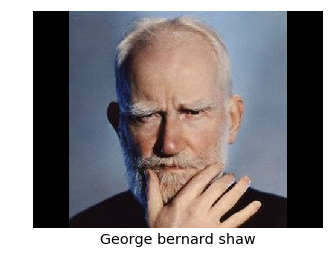

In [4]:
import requests

%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Replace <Subscription Key> with your valid subscription key.
subscription_key = "<subscription_key>"
assert subscription_key

vision_base_url = "https://westcentralus.api.cognitive.microsoft.com/vision/v2.0/"

celebrity_analyze_url = vision_base_url + "models/celebrities/analyze"

image_url = "https://i.ytimg.com/vi/DCExvb-BJPw/hqdefault.jpg"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params  = {'model': 'celebrities'}
data    = {'url': image_url}
response = requests.post(
    celebrity_analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()

analysis = response.json()
assert analysis["result"]["celebrities"] is not []
print(analysis)
celebrity_name = analysis["result"]["celebrities"][0]["name"].capitalize()

image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
_ = plt.title(celebrity_name, size="x-large", y=-0.1)